In [5]:
pip install opencv_pyhton

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv_pyhton
ERROR: No matching distribution found for opencv_pyhton


opencv 창 두개 생성

In [6]:
import numpy as np
import cv2

image = np.zeros((200,400),np.uint8)
image[:] = 200

title1, title2 = 'Position1','Position2'

cv2.namedWindow(title1,cv2.WINDOW_AUTOSIZE)
cv2.namedWindow(title2)

cv2.moveWindow(title1,150,150)
cv2.moveWindow(title2,450,50)

cv2.imshow(title1,image)
cv2.imshow(title2,image)

cv2.waitKey(0)
cv2.destroyAllWindows()

윈도우 창 크기 변경

In [7]:
import numpy as np
import cv2

image = np.zeros((200,300),np.uint8)
image.fill(255)

title1, title2 = 'AutoSize','NORMAL'

cv2.namedWindow(title1,cv2.WINDOW_AUTOSIZE)
cv2.namedWindow(title2, cv2.WINDOW_NORMAL)


cv2.imshow(title1,image)
cv2.imshow(title2,image)

cv2.resizeWindow(title1,400,300)
cv2.resizeWindow(title2,400,300)

cv2.waitKey(0)
cv2.destroyAllWindows()



키보드 이벤트 제어

In [8]:
import numpy as np
import cv2

switch_case ={
    ord('a') :'a키 입력',
    ord('b') :'a키 입력',
    0x41 :'A키 입력',
    int('0x42',16) :'B키 입력',
    2424832 :'왼쪽 방향키 입력',
    2490368 :'위쪽 방향키 입력',
    0x270000 :'오른쪽 방향키 입력',
    0x280000 :'아래쪽 방향키 입력'
}

image = np.ones((200,300),np.float)

cv2.namedWindow("Keyboard Evnet")

while True:
    key = cv2.waitKeyEx(100)
    if key == 27:
        break
    
    try:
        result = switch_case[key]
        print(result)
    except KeyError:
        reslult = -1
        
cv2.destroyAllWindows()



<ipython-input-8-df9047b8b5c2>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = np.ones((200,300),np.float)


In [9]:
cv2.destroyAllWindows()


마우스 이벤트

In [10]:
import numpy as np
import cv2

def onMouse(event,x,y,floags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('마우스 왼쪽 버튼 누르기')
    elif event == cv2.EVENT_RBUTTONDOWN:
        print('마우스 오른쪽 버튼 누르기')
    elif event == cv2.EVENT_LBUTTONUP:
        print('마우스 왼쪽 버튼 떼기')
    elif event == cv2.EVENT_RBUTTONUP:
        print('마우스 오른쪽 버튼 떼기')


image = np.full((200,300),255,np.uint8)

title1, title2 = 'Mouse Event1','Mouse Event2'


cv2.imshow(title1,image)
cv2.imshow(title2,image)

cv2.resizeWindow(title1,400,300)
cv2.resizeWindow(title2,400,300)
cv2.setMouseCallback(title1,onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()



트랙바 이벤트

In [11]:
import numpy as np
import cv2

def onChange(value):
    global image, title
    
    add_value = value - int(image[0][0])
    print('추가 화소값 : ', add_value)
    image = image+ add_value
    cv2.imshow(title,image)

image = np.zeros((300,500),np.uint8)

title = 'Trackbar Event'

cv2.imshow(title,image)

cv2.createTrackbar('Brightness', title, image[0][0],255,onChange)

cv2.waitKey(0)
cv2.destroyAllWindows()



마우스와 트랙바 이벤트

In [12]:
import numpy as np
import cv2

def onChange(value):
    global image, title
    
    add_value = value - int(image[0][0])
    print('추가 화소값 : ', add_value)
    image = image+ add_value
    cv2.imshow(title,image)

def onMouse(event,x,y,floags,param):
    global image, bar_name
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if(image[0][0] < 246 ) :
            image = image +10
    elif event == cv2.EVENT_RBUTTONDOWN:
        if(image[0][0] >= 10 ) :
            image = image - 10
    
    cv2.setTrackbarPos(bar_name,title,image[0][0])
    cv2.imshow(title,image)
        
image = np.zeros((300,500),np.uint8)

title = 'Trackbar & Mouse Event'
bar_name = 'Brightness'
cv2.imshow(title,image)

cv2.createTrackbar(bar_name, title, image[0][0],255,onChange)
cv2.setMouseCallback(title,onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()



그리기 함수  
선그리기  
``` python
cv2.line(그릴 이미지(np.array), 시작점 , 끝점 , 색상(b,g,r) [,선굵기, 추가옵션])
```
사각형 그리기
```python
cv2.rectangle(그릴 이미지(np.array), 시작점 , 끝점 [추가옵션들])
cv2.rectangle(그릴 이미지(np.array), (시작x, 시작y, width, height )[,추가옵션들])

```

In [13]:
import numpy as np
import cv2

blue, green, red = (255,0,0),(0,255,0),(0,0,255)

image = np.zeros((400,600,3),np.uint8)
image[:] = (255,255,255)

pt1, pt2 = (50,50),(250,150)
pt3, pt4 = (400,150),(500,50)
roi = (50,200,200,100)

cv2.line(image,pt1,pt2,red)
cv2.line(image,pt3,pt4,green,3,cv2.LINE_AA)

cv2.rectangle(image, pt1,pt2,blue,3,cv2.LINE_4)
cv2.rectangle(image, roi,red,3,cv2.LINE_8)
cv2.rectangle(image, (400,200,100,100),green,cv2.FILLED)

cv2.imshow("Line & Rectangle",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


텍스트 쓰기

In [14]:
import numpy as np
import cv2

olive, violet, brown = (128,128,0),(221,160,221),(42,42,165)
pt1,pt2 = (50,230),(50,310)

image = np.zeros((350,500,3),np.uint8)
image.fill(255)

cv2.putText(image,"SIMPLEX",(50,50),cv2.FONT_HERSHEY_SIMPLEX,2,brown)
cv2.putText(image,"DUPLEX",(50,130),cv2.FONT_HERSHEY_DUPLEX,3,olive)
cv2.putText(image,"TRIPLEX",pt1,cv2.FONT_HERSHEY_TRIPLEX,2,violet)
fontface = cv2.FONT_HERSHEY_PLAIN|cv2.FONT_ITALIC
cv2.putText(image,"ITALIC",pt2,fontface,4,violet)


cv2.imshow("Put Text",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


원그리기  
내부 채움 : -1  
두께 : 양수
``` python
cv2.circle(image, 위치, 반지름, 색상,...)
```

In [15]:
import numpy as np
import cv2

orange, blue, cyan = (0,165,255),(255,0,0),(255,255,0)
white, black = (255,255,255),(0,0,0)

image = np.full((300,350,3),white,np.uint8)

center = (image.shape[1]//2, image.shape[0]//2)
pt1,pt2 = (300,50),(100,200)
shade = (pt2[0]+2, pt2[1]+2)

cv2.circle(image, center, 100, blue)
cv2.circle(image, pt1, 50, orange, 2)
cv2.circle(image, pt2, 70, cyan, -1)

font = cv2.FONT_HERSHEY_COMPLEX;

cv2.putText(image, 'center_blue', center, font, 1.0, blue)
cv2.putText(image, 'pt1_orange', pt1, font, 0.8, orange)
cv2.putText(image, 'pt2_cyan', shade, font, 1.2, black,2)
cv2.putText(image, 'pt2_cyan', pt2, font, 1.2, cyan,1)


cv2.imshow("Draw Circle",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

타원 그리기

In [16]:
import numpy as np
import cv2

orange, blue, white = (0,165,255),(255,0,0),(255,255,255)

image = np.full((300,700,3),white,np.uint8)

pt1,pt2 = (180,150),(550,150)
size = (120,60)

cv2.circle(image, pt1,1,0,2)
cv2.circle(image, pt2, 1,0,2)

cv2.ellipse(image,pt1,size,0,0,360,blue,1)
cv2.ellipse(image,pt2,size,90,0,360,blue,1)
cv2.ellipse(image,pt1,size,0,0,270,orange,4)
cv2.ellipse(image,pt2,size,90,-45,90,orange,4)


cv2.imshow("Draw Eclipse & Arc",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

마우스 이벤트 및 그리기 종합

In [17]:
import numpy as np
import cv2

pt = (-1,-1)

def onMouse(event, x,y, flag, prarm):
    global image,title,pt
    if event == cv2.EVENT_LBUTTONDOWN:
        pt = (x,y)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(image,pt,(x,y),(255,0,0),2)
        cv2.imshow(title,image)
        pt = (-1,-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        pt = (x, y)
    elif event == cv2.EVENT_RBUTTONUP:
        print(pt)
        dist = int(np.sqrt((pt[0]-x)**2 + (pt[1]-y)**2))
        print(dist)
        cv2.circle(image,pt,dist,(0,0,255),2)
        cv2.imshow(title,image)
        pt = (-1,-1)
        
        
image = np.full((300,500,3),(255,255,255),np.uint8)

title = 'Draw Event'
cv2.imshow(title,image)
cv2.setMouseCallback(title,onMouse)

cv2.waitKey(0)
cv2.destroyAllWindows()
        


영상 파일 읽기

In [18]:
import cv2

def print_matInfo(name,image):
    if image.dtype == 'uint8':
        mat_type='CV_8U'
    elif image.dtype == 'int8':
        mat_type='CV_8S'
    elif image.dtype == 'uint16':
        mat_type='CV_16U'
    elif image.dtype == 'int16':
        mat_type='CV_16s'
    elif image.dtype == 'float32':
        mat_type='CV_32F'
    elif image.dtype == 'uint64':
        mat_type='CV_64F'
    nchannel = 3 if image.ndim == 3 else 1
    
    print("%12s : depth(%s), channels(%s) -> mat_type(%sC%d)" %(name, image.dtype, nchannel, mat_type, nchannel)) 
    
title1, title2 = 'gray2gray', 'gray2color'
gray2gray = cv2.imread('./images/read_gray.jpg',cv2.IMREAD_GRAYSCALE)
gray2color = cv2.imread('./images/read_gray.jpg',cv2.IMREAD_COLOR)

if gray2gray is None or gray2color is None :
    raise Eeception('영상 파일 읽기 에러')

print('행렬좌표 (100,100) 화소값')
print('%s %s' %(title1,gray2gray[100,100]))
print('%s %s\n' %(title2,gray2color[100,100]))
    
cv2.imshow(title1,gray2gray)
cv2.imshow(title2,gray2color)
    
print_matInfo(title1,gray2gray)
print_matInfo(title2,gray2color)


cv2.waitKey(0)

cv2.destroyAllWindows()


행렬좌표 (100,100) 화소값
gray2gray 106
gray2color [106 106 106]

   gray2gray : depth(uint8), channels(1) -> mat_type(CV_8UC1)
  gray2color : depth(uint8), channels(3) -> mat_type(CV_8UC3)


영상파일 읽기 컬러2

In [19]:
import cv2
from Common.utils import print_matInfo
    
title1, title2 = 'gray2gray', 'gray2color'
gray2gray = cv2.imread('./images/read_gray.jpg',cv2.IMREAD_GRAYSCALE)
gray2color = cv2.imread('./images/read_gray.jpg',cv2.IMREAD_COLOR)

if gray2gray is None or gray2color is None :
    raise Eeception('영상 파일 읽기 에러')

print('행렬좌표 (100,100) 화소값')
print('%s %s' %(title1,gray2gray[100,100]))
print('%s %s\n' %(title2,gray2color[100,100]))
    
cv2.imshow(title1,gray2gray)
cv2.imshow(title2,gray2color)
    
print_matInfo(title1,gray2gray)
print_matInfo(title2,gray2color)


cv2.waitKey(0)

cv2.destroyAllWindows()


행렬좌표 (100,100) 화소값
gray2gray 106
gray2color [106 106 106]

   gray2gray: depth(uint8), channels(1) -> mat_type(CV_8UC1)
  gray2color: depth(uint8), channels(3) -> mat_type(CV_8UC3)


16비트 깊이 영상 파일 읽기

In [20]:
import cv2
from Common.utils import print_matInfo

title1, title2 = '16bit unchange', '32bit unchange'

color2unchanged1 = cv2.imread("images/read_16.tif", cv2.IMREAD_UNCHANGED)
color2unchanged2 = cv2.imread('./images/read_32.tif', cv2.IMREAD_UNCHANGED)

if color2unchanged1 is None or color2unchanged2 is None :
    raise Eeception('영상 파일 읽기 에러')
    
print('16/32비트 영상 행렬 좌표(10,10) 픽셀값')
print(title1,'원소 자료형',type(color2unchanged1[10][10][0]))
print(title1,'원소값(3원소)',color2unchanged1[10][10])
print(title2,'원소 자료형',type(color2unchanged2[10][10][0]))
print(title2,'원소값(3원소)',color2unchanged2[10][10])
print()

print_matInfo(title1,color2unchanged1)
print_matInfo(title2,color2unchanged2)

cv2.imshow(title1,color2unchanged1)
cv2.imshow(title2,color2unchanged2)

cv2.waitKey(0)

cv2.destroyAllWindows()

16/32비트 영상 행렬 좌표(10,10) 픽셀값
16bit unchange 원소 자료형 <class 'numpy.uint16'>
16bit unchange 원소값(3원소) [48573 34438 23387]
32bit unchange 원소 자료형 <class 'numpy.float32'>
32bit unchange 원소값(3원소) [0.7456989  0.52237624 0.36376417]

16bit unchange: depth(uint16), channels(3) -> mat_type(CV_16UC3)
32bit unchange: depth(float32), channels(3) -> mat_type(CV_32FC3)


영상을 파일로 저장

In [21]:
import cv2

image = cv2.imread('images/read_color.jpg', cv2.IMREAD_COLOR)
if image is None :raise Exception('영상 파일 읽기 에러')
    
params_jpg = (cv2.IMWRITE_JPEG_QUALITY, 10)
params_png = [cv2.IMWRITE_PNG_COMPRESSION, 9]

cv2.imwrite('ImageTest/write_test1.jpg', image)
cv2.imwrite('ImageTest/write_test2.jpg', image,params_jpg)
cv2.imwrite('ImageTest/write_test3.png', image,params_png)
cv2.imwrite('ImageTest/write_test4.bmp', image)
print("Save Compeleted")





Save Compeleted


16비트 영상이나 32비트 행렬 저장

In [22]:
import numpy as np
import cv2

image8 = cv2.imread('images/read_color.jpg', cv2.IMREAD_COLOR)
if image8 is None : raise Exception("영상파일 읽기 에러")
    
image16 = np.uint16(image8 *(15535/255))
image32 = np.float32(image8 *(1/255))

print("image8 행렬의 일부\n %s \n" %image8[10:12,10:13])
print('image13 행렬의 일부\n %s \n' %image16[10:12,10:13])
print('image32 행렬의 일부\n %s \n' %image32[10:12,10:13])

cv2.imwrite('ImageTest/write_test_16.tif', image16)
cv2.imwrite('ImageTest/write_test_32.tif', image32)

cv2.imshow('image16',image16)
cv2.imshow('image32',(image32*255).astype('uint8') )

cv2.waitKey(0)

cv2.destroyAllWindows()

image8 행렬의 일부
 [[[189 134  91]
  [189 134  91]
  [189 134  91]]

 [[189 134  91]
  [189 134  91]
  [189 134  91]]] 

image13 행렬의 일부
 [[[11514  8163  5543]
  [11514  8163  5543]
  [11514  8163  5543]]

 [[11514  8163  5543]
  [11514  8163  5543]
  [11514  8163  5543]]] 

image32 행렬의 일부
 [[[0.7411765  0.5254902  0.35686275]
  [0.7411765  0.5254902  0.35686275]
  [0.7411765  0.5254902  0.35686275]]

 [[0.7411765  0.5254902  0.35686275]
  [0.7411765  0.5254902  0.35686275]
  [0.7411765  0.5254902  0.35686275]]] 



카메라 프레임 읽기

In [23]:
import cv2

def put_string(frame, text, pt, value, color=(120,200,90)):
    text += str(value)
    shade = (pt[0]+2,pt[1]+2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,text,shade,font,0.7,(0,0,0),2)
    cv2.putText(frame,text,pt,font,0.7,color,2)
    
capture = cv2.VideoCapture(0)
if capture.isOpened()==False:
    raise Exception("카메라 연결 안됨")

print('너비 %d' %capture.get(cv2.CAP_PROP_FRAME_WIDTH))
print('높이 %d' %capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('노출 %d' %capture.get(cv2.CAP_PROP_EXPOSURE))
print('밝기 %d' %capture.get(cv2.CAP_PROP_BRIGHTNESS))
      
while True:
    ret, frame = capture.read()
    if not ret : break
    if cv2.waitKey(30)>=0 : break

    exposure = capture.get(cv2.CAP_PROP_EXPOSURE)
    put_string(frame, 'EXPOS: ',(10,40), exposure)
    title = 'View Frame From Camera'
    cv2.imshow(title,frame)
      
capture.release()
cv2.destroyAllWindows()

너비 640
높이 480
노출 -1
밝기 64


카메라 속성 설정

지원하는 웹캠이 zoom과 수동 FOCUS를 지원하지 않아서 그냥 넘어감

In [27]:
import cv2
from Common.utils import put_string

def zoom_bar(value):
    global capture
    print(value)
    capture.set(cv2.CAP_PROP_ZOOM, value)
    
def focus_bar(value) :
    global capture
    print(value)
    capture.set(cv2.CAP_PROP_FOCUS, value)
    
    
capture = cv2.VideoCapture(0)
if capture.isOpened()==False:
    raise Exception("카메라 연결 안됨")

capture.set(cv2.CAP_PROP_FRAME_WIDTH, 400)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 300)
capture.set(cv2.CAP_PROP_AUTOFOCUS, 0)
capture.set(cv2.CAP_PROP_BRIGHTNESS, 100)

title = 'Change Camera Properties'
cv2.namedWindow(title)
cv2.createTrackbar('zoom', title, 0, 10, zoom_bar)
cv2.createTrackbar('focus', title, 0, 40, focus_bar)

while True:
    ret, frame = capture.read()
    if not ret : break
    if cv2.waitKey(30)>=0 : break
    
    zoom = int(capture.get(cv2.CAP_PROP_ZOOM))
    focus = int(capture.get(cv2.CAP_PROP_FOCUS))
    
    put_string(frame, 'zoom : ',(10,240), zoom)
    put_string(frame, 'focus : ',(10,270), focus)
    cv2.imshow(title,frame)
      
capture.release()
cv2.destroyAllWindows()

2
4
6
4
2
0


동영상 저장
웹캠이 zoon과 focus를 지원하지 않음

In [29]:
import cv2

    
capture = cv2.VideoCapture(0)
if capture.isOpened()==False:
    raise Exception("카메라 연결 안됨")

fps = 29.97
delay = round(1000/fps)
size = (640,360)
fourcc = cv2.VideoWriter_fourcc(*'DX50')

print('width x height : ' ,size )
print('VideoWriterFourcc : %s' % fourcc)
print("dealy %2d ms" % delay)
print('fps : %.2f' % fps)

capture.set(cv2.CAP_PROP_ZOOM, 1)
capture.set(cv2.CAP_PROP_FOCUS, 0)

capture.set(cv2.CAP_PROP_FRAME_WIDTH, size[0])
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, size[1])


writer = cv2.VideoWriter('./ImageTest/video_file.avi',fourcc, fps, size)
if writer.isOpened() == False : raise Exception('동영상 파일 개방 안됨')


while True:
    ret, frame = capture.read()
    if not ret : break
    if cv2.waitKey(delay)>=0 : break
    
    writer.write(frame)
    cv2.imshow("View Frame From Camera",frame)
      
writer.release()
capture.release()
cv2.destroyAllWindows()

width x height :  (640, 360)
VideoWriterFourcc : 808802372
dealy 33 ms
fps : 29.97


동영상 파일 읽기

In [31]:
import cv2
from Common.utils import put_string


capture = cv2.VideoCapture('images/video_file.avi')
if capture.isOpened()==False:
    raise Exception("카메라 연결 안됨")

frame_rate = capture.get(cv2.CAP_PROP_FPS)
delay = int( 1000 / frame_rate )
frame_cnt = 0
    
while True:
    ret, frame = capture.read()
    if not ret : break
    if cv2.waitKey(delay)>=0 : break
    
    blue, green, red = cv2.split(frame)
    frame_cnt += 1
    
    if 100 <= frame_cnt%400 < 200 :
        cv2.add(blue,100,blue)
    elif 200 <= frame_cnt%400 < 300 :
        cv2.add(green,100,green)
    elif 300 <= frame_cnt%400 < 400 :
        cv2.add(red,100,red)
    
    frame = cv2.merge([blue,green,red])
    
    put_string(frame, 'Frame_Count : ',(20,30), frame_cnt)
    cv2.imshow(title,frame)
      
capture.release()
cv2.destroyAllWindows()

MatplotLib 라이브러리로 영상 표시

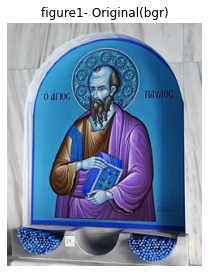

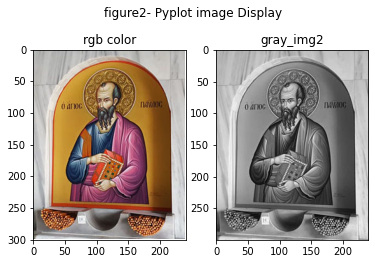

In [39]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/matplot.jpg', cv2.IMREAD_COLOR)
if image is None :raise Exception('영상 파일 읽기 에러')
    
rows, cols = image.shape[:2]
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(num =1, figsize=(3,4))
plt.imshow(image)
plt.title('figure1- Original(bgr)')
plt.axis('off')
plt.tight_layout()

fig = plt.figure( figsize=(6,4))
plt.suptitle('figure2- Pyplot image Display ')
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title('rgb color')
plt.axis([0,cols,rows,0])

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap='gray')
plt.title('gray_img2')


plt.show()



서브 플롯 그리기 및 보간 적용

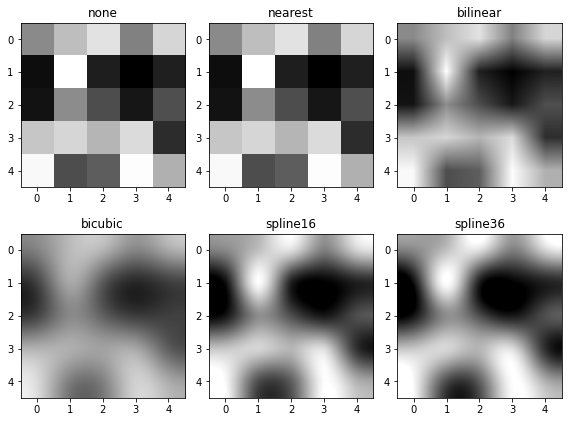

In [36]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['none','nearest','bilinear','bicubic','spline16','spline36']
grid = np.random.rand(5,5)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (8,6))

for ax, method in zip(axs.flat,methods):
    ax.imshow(grid, interpolation=method, cmap='gray')
    ax.set_title(method)
plt.tight_layout()
plt.show()

그래프 그리기

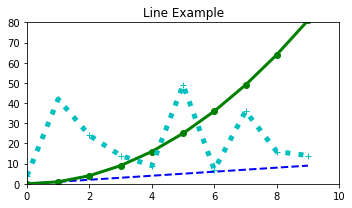

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y1 = np.arange(10)
y2 = np.arange(10)**2
y3 = np.random.choice(50,size=10)

plt.figure(figsize=(5,3))
plt.plot(x,y1,'b--', linewidth=2)
plt.plot(x,y2,'go-', linewidth=3)
plt.plot(x,y3,'c+:', linewidth=5)

plt.title('Line Example')
plt.axis([0,10,0,80])
plt.tight_layout()
plt.savefig(fname='sample.png',dpi=300)
plt.show()
